*__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 11, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 22: Intro to the Leapfrog Method</font></center>

## <font color=#46769B>Introduction</font>

The goals of this exercise are:
- Gain experience with leapfrog methods for solving second-order ODEs

Required reading:
- *Lesson 11: Leapfrog method*


## <font color=#46769B>Exercise: Part (a)</font>

Consider a __simple pendulum__, given by the equation of motion

$$\theta''(t) + \omega^2 \sin(\theta(t)) = 0 \, , $$

with $\omega = 2\pi$. Take the interval for $t$ to be $[0,200]$ and the boundary condition 

$$\theta(0) = 3 , \quad \theta'(0) = 0 \, .$$

Perform the following tasks:
- Write a function `leapfrog_method(num_steps)` to implement the __leapfrog method__ for this system (kick-drift-kick algorithm), where `num_steps` refers to the number of steps $N$. Your function should `return t, x, v`, so that you can call it as follows:
```py
t, x, v = leapfrog_method(num_steps)
```
where `t`, `x`, `v` are all `numpy.arrays` of length $N+1$. (To make the syntax clear with Lesson 11, note that $x(t) = \theta(t)$ and $v(t) = \theta'(t)$.)
- Similar to what we did with Runge-Kutta algorithms, write a code to double the number of steps until your leapfrog result has converged within a tolerance of `atol=1e-2` and `rtol=1e-2`.
- Solve the simple pendulum again with the midpoint method and RK4. Take the same value of $N$ that you found for your converged solution for the leapfrog method, i.e., don't perform the converge test for the RK methods.
- Plot the $x(t)$ vs $t$ for the range $[190,200]$ for all three methods (leapfrog, midpoint, RK4) on a single plot.
- Make a plot of the energy difference $\Delta E = |E - E_{\rm exact}|$ vs $t$ for all three methods on a single plot. Use a log scale for the $y$-axis.

For the last part, let's clarify what the energy $E$ is here. Note that the kinetic energy of the pendulum is 

$$T = \frac{1}{2} m v^2 = \frac{1}{2} m \ell^2 {\theta'}^2 \, $$

where $\ell$ is the length of the pendulum arm and $m$ is the mass of the bob. The potential energy of the pendulum is 

$$U = m g h = m g \ell(1-\cos\theta) = m \ell^2 \omega^2 (1-\cos\theta) \, .$$

Since we don't care about the overall factor of $m \ell^2$, let's define $E$ to be energy-per-mass-per-length-squared, i.e.,

$$E = \frac{T+U}{m\ell^2} = \frac{1}{2} {\theta^\prime}^2 + \omega^2 (1- \cos\theta) \, .$$




leapfrog method converged with 204800 steps


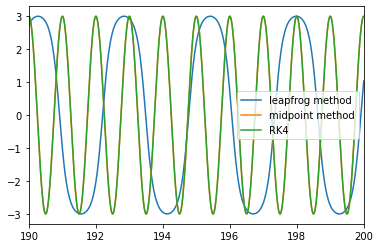

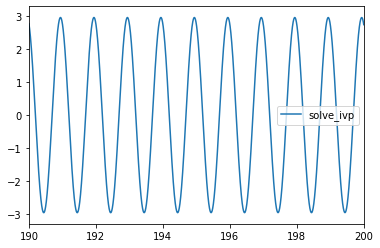

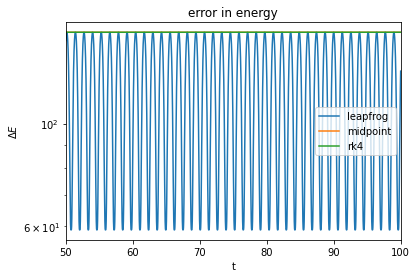

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definitions
t0, tf = 0, 200
omega = 2*np.pi
x0, v0 = 3, 0

import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

t0, tf = 0, 200
omega = 2*np.pi
x0, v0 = 3, 0

def accel(t,x):
  return -omega**2 * np.sin(x)

def leapfrog_method(num_steps):
  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1] - t[0] 

  x = np.zeros(num_steps+1)
  v = np.zeros(num_steps+1)

  x[0] = x0 
  v[0] = v0 

  a = accel(t0,x0)

  for i in range(num_steps):
    v_half = v[i] + h/2 * a 
    x[i+1] = x[i] + h*v_half

    a = accel(t[i+1],x[i+1]) 

    v[i+1] = v_half + h/2 * a 
  
  return t, x, v 


# calculate convergence 

num_steps = 100

t, x_old, v_old = leapfrog_method(num_steps)

not_converged_yet = True 

while not_converged_yet:
  num_steps = 2*num_steps
  t,x_new,v_new = leapfrog_method(num_steps)
  not_converged_yet = not(np.allclose(x_old,x_new[::2],atol=1e-2,rtol=1e-2))
  x_old = x_new
  v_old = v_new

print('leapfrog method converged with', num_steps, 'steps')

plt.plot(t,x_new,label='leapfrog method')
plt.xlim(190,200)
plt.legend()


# midpoint method
t = np.linspace(t0,tf,num=num_steps+1)
h = t[1] - t[0]

def f(t,y):
    y1, y2 = y
    return np.array([y2,-omega**2*y1])

y = np.zeros((num_steps+1,2))
y[0] = [x0,v0]

for i in range(num_steps):
    ti = t[i]
    yi = y[i]
    k1 = f(ti,yi)
    k2 = f(ti+0.5*h,yi+0.5*h*k1)
    y[i+1] = yi + h*k2

x_mid = y[:,0]
v_mid = y[:,1]

plt.plot(t,x_mid,label='midpoint method')
plt.xlim(190,200)
plt.legend()


# RK4 

y = np.zeros((num_steps+1,2))
y[0] = [x0,v0]

for i in range(num_steps):
  ti = t[i]
  yi = y[i] 
  k1 = f(t[i],y[i])
  k2 = f(t[i] + h/2, y[i] + h/2 * k1)
  k3 = f(t[i] + h/2, y[i] + h/2 * k2)
  k4 = f(t[i] + h, y[i] + h * k3)
  k = 1/6 * (k1+2*k2+2*k3+k4)
  y[i+1] = y[i] + h*k

x_rk4 = y[:,0]
v_rk4 = y[:,1]

plt.plot(t,x_rk4,label='RK4')
plt.xlim(190,200)
plt.legend()
plt.show()

sol = solve_ivp(f, [t0,tf], [x0,v0], t_eval=t)
y = sol.y[0]
plt.plot(t,y,label='solve_ivp')
plt.legend()
plt.xlim(190,200)
plt.show()

E_exact = 0.5*omega**2

E = 0.5*(v_new**2 + omega**2*x_new**2)
E_mid = 0.5*(v_mid**2 + omega**2*x_mid**2)
E_rk4 = 0.5*(v_rk4**2 + omega**2*x_rk4**2)

plt.plot(t,np.abs(E-E_exact),label='leapfrog')
plt.plot(t,np.abs(E_mid-E_exact),label='midpoint')
plt.plot(t,np.abs(E_rk4-E_exact),label='rk4')

plt.xlabel('t')
plt.ylabel(r'$\Delta E$')
plt.yscale('log')
plt.xlim([50,100])
plt.title('error in energy')
plt.legend()
plt.show()

## <font color=#46769B>Part (b)</font>

The goal of this exercise is to demonstrate that the leapfrog method conserves __angular momentum__ *exactly*. As an example of a system where it is possible to have angular momentum, let's consider a __simple harmonic oscillator__ that is free to move in __two-dimensions__. 

Suppose we have a mass $m$ that is free to move in the $x$-$y$ plane, subject to a restoring spring force that pulls it back to its equilibrium position at $x=y=0$, with spring constant $k$. Newton's second law for each direction is

$$x''(t) = - \frac{k}{m} \, x(t) = - \omega^2  x(t)$$

$$y''(t) = - \frac{k}{m} \, y(t) = - \omega^2  y(t)$$

where $\omega = \sqrt{k/m}$. 

Here we will solve this system of equations as a coupled ODE, but you can see that it is not really necessary: the equations are not actually coupled. (The ODE for $x$ doesn't depend on $y$, and vice-versa.) However, we are going to treat this exercise as *practice* in working with coupled ODEs, and so you will formulate your algorithm *as if it were a coupled system.*

First, we define the position and velocity vectors as

$$\mathbf{r}(t) = \left( \begin{array}{c} x(t) \\ y(t) \end{array} \right) \, , \qquad
\mathbf{v}(t) = \left( \begin{array}{c} v_x(t) \\ v_y(t) \end{array} \right) \, .$$

Then Newton's second law is

$$\mathbf{r}''(t) = \mathbf{a}(t,\mathbf r) = - \omega^2 \mathbf{r}(t)$$

where $\mathbf{a}$ is the acceleration function. We will assume the boundary conditions

$$\mathbf{r}(0) = \left( \begin{array}{c} x(0) \\ y(0) \end{array} \right) = \left( \begin{array}{c} 1 \\ 0 \end{array} \right) \, , \quad \mathbf{v}(0) = \left( \begin{array}{c} v_x(0) \\ v_y(0) \end{array} \right) = \left( \begin{array}{c} 0 \\ \tfrac{1}{2} \end{array} \right) \, ,$$

and take the (angular) frequency $\omega = 1$. With these assumptions, the exact solutions are

$$x(t) = \cos(t) \, \qquad v_x(t) = - \sin(t)$$

$$y(t) = \frac{1}{2} \sin(t) \, \qquad v_y(t) = \frac{1}{2} \cos(t) \, .$$

Lastly, the angular momentum for the system is 

$$L = x(t) \, v_y(t) - y(t) \, v_x(t)$$ 

According to our exact solution, we have a constant value $L_{\rm exact}=\tfrac{1}{2}$.

Your tasks are as follows:
- Solve for $\vec{r}(t)$ and $\vec{v}(t)$ using the leapfrog method *for a coupled system* (kick-drift-kick algorithm) for the time interval $[0,50]$ and for $N=10^4$ steps. You will need to define your acceleration function as something like:
```py
def a(t,r):
    x, y = r
    return - omega**2 * np.array([x,y])
```
This is just to make it clear that the `r` slot is a two-component object and the value returned is also a two-component object (must be a `numpy.array`).
- Compare your solutions $x(t)$, $y(t)$, $v_x(t)$, $v_y(t)$ to the exact ones to be sure that yours are correct.
- Compute $L$ as a function of $t$ from your numerical solution and make a plot of $L-L_{\rm exact}$ vs $t$. 
- Repeat the previous step using the midpoint method to solve the same system for the same value of $N$, computing $L$ vs $t$, and plotting $L - L_{\rm exact}$ for this method.

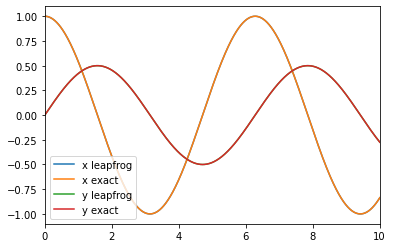

my solution is correct


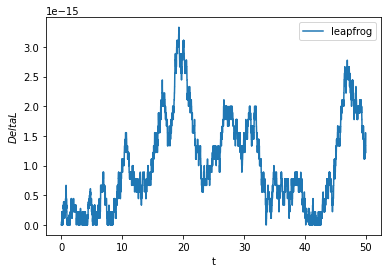

In [2]:
omega = 1
num_steps = 10**4 
t0,tf = 0, 50 

t = np.linspace(t0,tf,num=num_steps+1)
h = t[1]-t[0]

x0, y0 = 1,0
v0x, v0y = 0, 0.5 
r0 = np.array([x0,y0])

def accel(t,r):
  x,y = r
  return -omega**2 * np.array([x,y])

r = np.zeros((num_steps+1,2))
v = np.zeros((num_steps+1,2))
r[0] = np.array([x0,y0])
v[0] = np.array([v0x,v0y])

a = accel(t0,r0)

for i in range(num_steps):
  v_half = v[i] + h/2 * a 
  r[i+1] = r[i] + h*v_half

  a = accel(t[i+1],r[i+1]) 

  v[i+1] = v_half + h/2 * a 

#check my solution is correct
plt.plot(t,r[:,0],label='x leapfrog')
plt.plot(t,np.cos(t),label='x exact')
plt.plot(t,r[:,1],label='y leapfrog')
plt.plot(t,0.5*np.sin(t),label='y exact')
plt.legend()
plt.xlim(0,10)
plt.show()
print('my solution is correct')

#compute L 
x = r[:,0]
y = r[:,1]
v_x = v[:,0]
v_y = v[:,1]


L = x*v_y - y*v_x

L_exact = 0.5 

plt.plot(t,np.abs(L-L_exact),label='leapfrog')
plt.ylabel(r'$Delta L$')
plt.xlabel('t')
plt.legend()
plt.show()

#using midpoint method... coulnd't figure it out 
